In [40]:
import gym
import numpy as np
import matplotlib.pyplot as plt 
import time
import random

env = gym.make("MiniGrid-Empty-6x6-v0")
env.reset()

({'image': array([[[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [1, 0, 0],
          [1, 0, 0],
          [1, 0, 0],
          [1, 0, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [1, 0, 0],
          [1, 0, 0],
          [1, 0, 0],
          [1, 0, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [1, 0, 0],
          [1, 0, 0],
          [1, 0, 0],
          [1, 0, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [8, 1, 0],
 

In [45]:
rwds = []
alpha = 0.2
gamma = 0.7
labda = 0.8
epsilon = 0.9
n_action = 3
no_of_episode = 150
no_of_step = 140
destn= (4,4)
rews = []
sts = []

Q_sa = {}
for i in range(1, 6):
    for j in range(1, 6):
        for d in range(4):
            Q_sa[((i,j), d)] = {a: 0 for a in range(n_action)}



In [46]:
# Requred Function 
def TakeAction(env,action):
    obs,reward,done,max_step,_ = env.step(action)
    next_state=(env.agent_pos,obs['direction'])
    return reward,next_state,done,max_step

def eps_greedy(state,epsilon):
    if np.random.rand()<epsilon:
        # Go Explor 
        action = np.random.randint(0,3)
    else:
        # Go Greedy 
        action = max(Q_sa[state],key=Q_sa[state].get)
    return action

    

In [51]:
# Sarsa Lambda

for episode in range(no_of_episode):
    env.reset()
    epsilon = max(0.01, epsilon * 0.99)
    Egbt ={}
    steps = 0 
    Gt=0
    
    for state in  Q_sa:
        for action in (Q_sa[state]):
                     Egbt[(state,action)] = 0
    state =((1,1),0)
    action = eps_greedy(state,epsilon)
    for setp in range(no_of_step):
        reward,next_state,done,max_step = TakeAction(env,action)
        next_action = eps_greedy(next_state,epsilon)
        delta = reward+gamma*Q_sa[next_state][next_action]-Q_sa[state][action]
        Egbt[(state,action)] +=1
        for state in  Q_sa:
            for action in Q_sa[state]:
                Q_sa[state][action] += alpha*delta*Egbt[(state,action)]
                Egbt[(state,action)] = gamma*labda*Egbt[(state,action)]
        Gt+=reward
        steps+=1
        if done or max_step  :
            break
        
        
        state = next_state
        action = next_action
    rews.append(Gt)
    sts.append(steps)
        
print(rews)

[0, 0, 0, 0.575, 0.7625, 0.44375, 0, 0.84375, 0.80625, 0.74375, 0, 0.7375, 0.64375, 0.33124999999999993, 0.575, 0.86875, 0.4, 0.26874999999999993, 0.8125, 0.775, 0.80625, 0.9375, 0.85625, 0.56875, 0.8875, 0.8, 0.7, 0.85, 0.73125, 0.86875, 0.86875, 0.90625, 0.86875, 0.8125, 0.925, 0.775, 0.90625, 0.8375, 0.86875, 0.9, 0.8, 0.925, 0.9125, 0.9375, 0.8625, 0.9125, 0.91875, 0.91875, 0.6812499999999999, 0.8875, 0.81875, 0.74375, 0.9, 0.8625, 0.85, 0.90625, 0.88125, 0.8, 0.90625, 0.925, 0.9125, 0.95, 0.9125, 0.925, 0.9, 0.925, 0.8875, 0.93125, 0.7625, 0.8625, 0.9125, 0.86875, 0.94375, 0.89375, 0.95625, 0.91875, 0.925, 0.90625, 0.8875, 0.9375, 0.89375, 0.95, 0.90625, 0.88125, 0.85, 0.95, 0.9125, 0.95, 0.93125, 0.925, 0.925, 0.925, 0.925, 0.95, 0.8875, 0.9375, 0.95, 0.9, 0.9, 0.95, 0.9125, 0.925, 0.925, 0.9375, 0.95, 0.9125, 0.9125, 0.95, 0.90625, 0.95, 0.9375, 0.925, 0.93125, 0.875, 0.95, 0.925, 0.95, 0.93125, 0.94375, 0.93125, 0.875, 0.9, 0.93125, 0.93125, 0.89375, 0.95, 0.925, 0.89375, 0.918

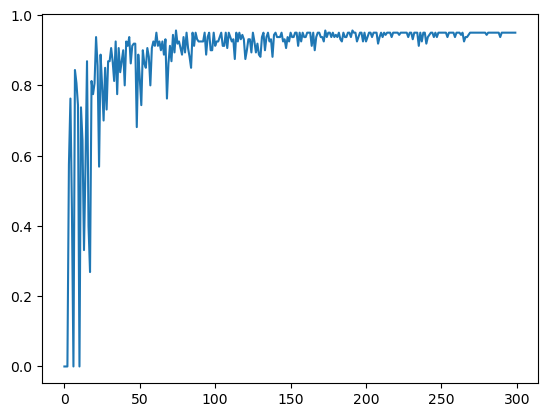

In [52]:
plt.plot(rews)
plt.xlable("Episode")
plt.ylable("Reward")

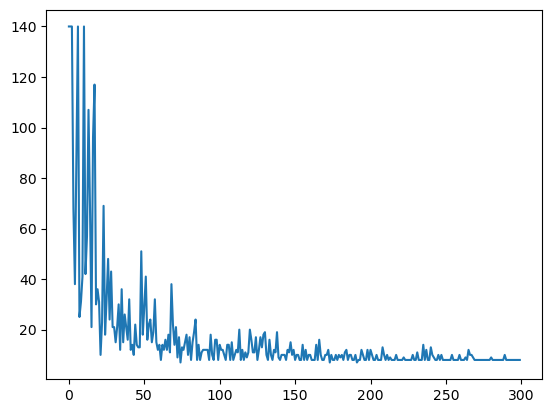

In [53]:
plt.plot(sts)
plt.xlable("Episode")
plt.ylable("Steps")

[0, 0, 0, 0.575, 0.7625, 0.44375, 0, 0.84375, 0.80625, 0.74375, 0, 0.7375, 0.64375, 0.33124999999999993, 0.575, 0.86875, 0.4, 0.26874999999999993, 0.8125, 0.775, 0.80625, 0.9375, 0.85625, 0.56875, 0.8875, 0.8, 0.7, 0.85, 0.73125, 0.86875, 0.86875, 0.90625, 0.86875, 0.8125, 0.925, 0.775, 0.90625, 0.8375, 0.86875, 0.9, 0.8, 0.925, 0.9125, 0.9375, 0.8625, 0.9125, 0.91875, 0.91875, 0.6812499999999999, 0.8875, 0.81875, 0.74375, 0.9, 0.8625, 0.85, 0.90625, 0.88125, 0.8, 0.90625, 0.925, 0.9125, 0.95, 0.9125, 0.925, 0.9, 0.925, 0.8875, 0.93125, 0.7625, 0.8625, 0.9125, 0.86875, 0.94375, 0.89375, 0.95625, 0.91875, 0.925, 0.90625, 0.8875, 0.9375, 0.89375, 0.95, 0.90625, 0.88125, 0.85, 0.95, 0.9125, 0.95, 0.93125, 0.925, 0.925, 0.925, 0.925, 0.95, 0.8875, 0.9375, 0.95, 0.9, 0.9, 0.95, 0.9125, 0.925, 0.925, 0.9375, 0.95, 0.9125, 0.9125, 0.95, 0.90625, 0.95, 0.9375, 0.925, 0.93125, 0.875, 0.95, 0.925, 0.95, 0.93125, 0.94375, 0.93125, 0.875, 0.9, 0.93125, 0.93125, 0.89375, 0.95, 0.925, 0.89375, 0.918

NameError: name 'plot' is not defined